### Pré Processamento

In [1]:
import nltk
import wikipedia
import re
import spacy
from nltk.probability import FreqDist
import pandas as pd
nltk.download("stopwords")
nltk.download('punkt')
nltk.download('rslp')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\bcesa\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\bcesa\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package rslp to
[nltk_data]     C:\Users\bcesa\AppData\Roaming\nltk_data...
[nltk_data]   Package rslp is already up-to-date!


True

### Importando os comentários


In [2]:

df_corpus = pd.read_csv("TrainTema.csv", sep=";", usecols=["tweet_text", "sentiment", "query_used"])

In [3]:
#### obter tokens utilizando o método split

df_corpus["tokens_split"] = df_corpus["tweet_text"].str.split()

In [4]:
## remover menções ao usuário
df_corpus["tokens_split"] = df_corpus["tokens_split"].apply(lambda x: [i for i in x if not i.startswith("@")])

In [5]:
### remover links
df_corpus["tokens_split"] = df_corpus["tokens_split"].apply(lambda x: [i for i in x if not i.startswith("http")])

In [7]:
### definir função de plotar a frequência dos tokens
def plot_frequencia_tokens(serie_tokens):
    ### recebe uma série de tokens(coluna do dataframe)
    ### e retorna um gráfico de frequência
    ##instanciar lista para armazenar tokens
    tokens = []
    ##iterar sobre a série de tokens
    for lista_tokens in serie_tokens:
        tokens.extend(lista_tokens)
    fd_words = FreqDist(tokens)

    fd_words.plot(30)
    return fd_words
# Split


In [8]:
### transformar para letras minúsculas
df_corpus["tokens_split"] = df_corpus["tokens_split"].apply(lambda x: [token.lower() for token in x])

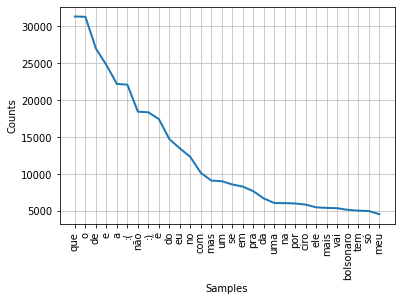

FreqDist({'que': 31346, 'o': 31304, 'de': 27001, 'e': 24764, 'a': 22204, ':(': 22104, 'não': 18444, ':)': 18359, 'é': 17430, 'do': 14722, ...})

In [9]:
plot_frequencia_tokens(df_corpus["tokens_split"])

In [10]:
### remover stopwords
from nltk.corpus import stopwords
portugues_stops = stopwords.words('portuguese')
df_corpus["tokens_split"] = df_corpus["tokens_split"].apply(lambda x: [token for token in x if token not in portugues_stops])

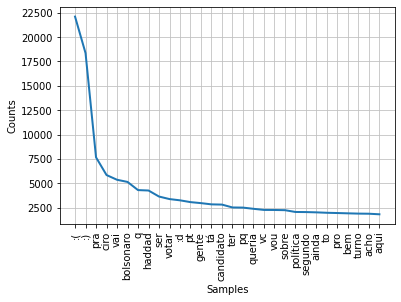

FreqDist({':(': 22104, ':)': 18359, 'pra': 7657, 'ciro': 5839, 'vai': 5353, 'bolsonaro': 5132, 'q': 4294, 'haddad': 4251, 'ser': 3632, 'votar': 3371, ...})

In [12]:
plot_frequencia_tokens(df_corpus["tokens_split"])

In [13]:
### mais stopwords aplicáveis ao caso em específico
mais_stops =["pra", "ciro", "bolsonaro", "haddad", "pt", "lula","amoedo","boulos","daciolo","bozo","alvaro", "marina", "silva", "alckmin"]
portugues_stops.extend(mais_stops)

df_corpus["tokens_split"] = df_corpus["tokens_split"].apply(lambda x: [token for token in x if token not in portugues_stops])

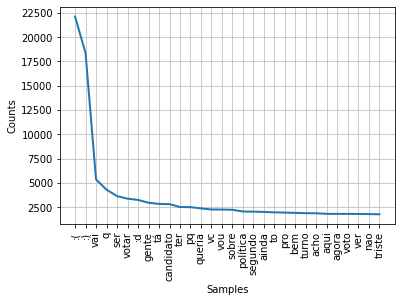

FreqDist({':(': 22104, ':)': 18359, 'vai': 5353, 'q': 4294, 'ser': 3632, 'votar': 3371, ':d': 3243, 'gente': 2955, 'tá': 2828, 'candidato': 2805, ...})

In [14]:
plot_frequencia_tokens(df_corpus["tokens_split"])

In [15]:
#remover números
df_corpus["tokens_split"] = df_corpus["tokens_split"].apply(lambda x: [re.sub(r'[0-9]',"",token) for token in x])

In [16]:
### remover pontos
df_corpus["tokens_split"] = df_corpus["tokens_split"].apply(lambda x: [re.sub(r'[^\w]',"",token) for token in x])

In [17]:
### remover acentos e tokens vazios
from unidecode import unidecode

df_corpus["tokens_split"] = df_corpus["tokens_split"].apply(lambda x: [unidecode(token) for token in x if token != ""])

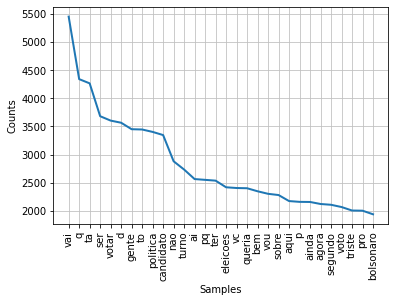

FreqDist({'vai': 5451, 'q': 4340, 'ta': 4265, 'ser': 3681, 'votar': 3603, 'd': 3565, 'gente': 3450, 'to': 3445, 'politica': 3402, 'candidato': 3346, ...})

In [18]:
## Ao plotar os tokens , percebe-se a necessidade de exclusão adicional das stopwords
plot_frequencia_tokens(df_corpus["tokens_split"])

In [19]:
import spacy
# carregar stopwords em português
pt = spacy.load('pt_core_news_sm')
sw_spacy = pt.Defaults.stop_words
### remover stopwords
df_corpus["tokens_split"] = df_corpus["tokens_split"].apply(lambda x: [token for token in x if token not in sw_spacy])
df_corpus["tokens_split"] = df_corpus["tokens_split"].apply(lambda x: [token for token in x if token not in portugues_stops])

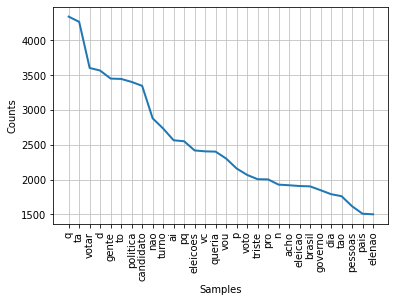

FreqDist({'q': 4340, 'ta': 4265, 'votar': 3603, 'd': 3565, 'gente': 3450, 'to': 3445, 'politica': 3402, 'candidato': 3346, 'nao': 2880, 'turno': 2733, ...})

In [20]:
plot_frequencia_tokens(df_corpus["tokens_split"])

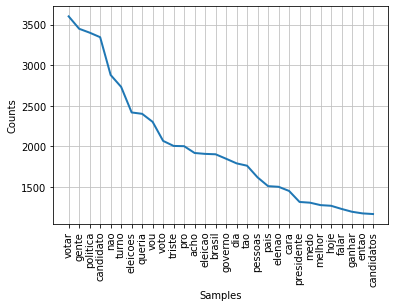

FreqDist({'votar': 3603, 'gente': 3450, 'politica': 3402, 'candidato': 3346, 'nao': 2880, 'turno': 2733, 'eleicoes': 2418, 'queria': 2401, 'vou': 2302, 'voto': 2067, ...})

In [21]:
### remover erros de ortografia mais óbvios e tokens com 2 caracters ou menos


df_corpus["tokens_split"] = df_corpus["tokens_split"].apply(lambda x: [token for token in x if len(token) > 2])
plot_frequencia_tokens(df_corpus["tokens_split"])

In [22]:
# visualizando os tokens gerados
# 
df_corpus.head(5)

,tweet_text,sentiment,query_used,tokens_split
0,@BabozeirasDaTv @aliviavasconc @Haddad_Fernand...,1,@haddad_fernando :),"[olha, candidato, trabalha, verdade, passar, v..."
1,@TelesPonte @rei_da_selfie @TCelTito @metal_th...,1,@jairbolsonaro :),"[incomoda, acima, falei, reconhecida, amo, viv..."
2,No ultimo podcast Café Brasil (um dos maiores ...,1,eleicao :),"[ultimo, podcast, cafe, brasil, maiores, brasi..."
3,@zelune @Haddad_Fernando @jairbolsonaro PARABÉ...,1,@haddad_fernando :),"[parabens, barbudo, gostoso]"
4,@ManuelaDavila Nunca vi tanto passa-fome junto :),1,@manueladavila :),"[passafome, junto]"


In [25]:
import pt_core_news_sm

In [26]:
#carrega o modelo para português
nlp = pt_core_news_sm.load()

In [27]:
### transformar a lista em uma string

df_corpus["tokens_lema"] = df_corpus["tokens_split"].apply(lambda x: " ".join(x))


In [28]:
#### carregar os tokens no modelo
df_corpus["tokens_lema"] = df_corpus["tokens_lema"].apply(lambda x: nlp(x))


In [29]:
## extrair o atributo lemma_ para cada token
df_corpus["tokens_lema"] = df_corpus["tokens_lema"].apply(lambda x: [token.lemma_ for token in x])

In [30]:
## excluir as linhas com tokens vazios
df_corpus = df_corpus[df_corpus["tokens_lema"].str.len() > 0]

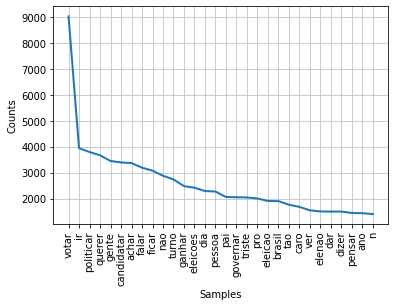

FreqDist({'votar': 9037, 'ir': 3946, 'politicar': 3798, 'querer': 3670, 'gente': 3451, 'candidatar': 3395, 'achar': 3370, 'falar': 3193, 'ficar': 3077, 'nao': 2880, ...})

In [31]:
##plotar a frequência dos tokens
plot_frequencia_tokens(df_corpus["tokens_lema"])

In [32]:
### criar coluna de tokens como strings

df_corpus["tokens_lema_string"] = df_corpus["tokens_lema"].apply(lambda x: " ".join(x))
df_corpus["tokens_split_string"] = df_corpus["tokens_split"].apply(lambda x: " ".join(x))

In [33]:
df_corpus

,tweet_text,sentiment,query_used,tokens_split,tokens_lema,tokens_lema_string,tokens_split_string
0,@BabozeirasDaTv @aliviavasconc @Haddad_Fernand...,1,@haddad_fernando :),"[olha, candidato, trabalha, verdade, passar, v...","[olhar, candidatar, trabalhar, verdade, passar...",olhar candidatar trabalhar verdade passar verg...,olha candidato trabalha verdade passar vergonh...
1,@TelesPonte @rei_da_selfie @TCelTito @metal_th...,1,@jairbolsonaro :),"[incomoda, acima, falei, reconhecida, amo, viv...","[incomodar, acima, falar, reconhecido, amar, v...",incomodar acima falar reconhecido amar viver a...,incomoda acima falei reconhecida amo viveu ano...
2,No ultimo podcast Café Brasil (um dos maiores ...,1,eleicao :),"[ultimo, podcast, cafe, brasil, maiores, brasi...","[ultimar, podcast, cafe, brasil, maior, brasil...",ultimar podcast cafe brasil maior brasil oport...,ultimo podcast cafe brasil maiores brasil opor...
3,@zelune @Haddad_Fernando @jairbolsonaro PARABÉ...,1,@haddad_fernando :),"[parabens, barbudo, gostoso]","[parabens, barbudo, gostoso]",parabens barbudo gostoso,parabens barbudo gostoso
4,@ManuelaDavila Nunca vi tanto passa-fome junto :),1,@manueladavila :),"[passafome, junto]","[passafome, juntar]",passafome juntar,passafome junto
...,...,...,...,...,...,...,...
49994,meu deus o lula :(((,0,lula :(,[deus],[deus],deus,deus
49996,":( Por 6 a 1, TSE rejeita candidatura de Lula ...",0,lula :(,"[tse, rejeita, candidatura]","[tse, rejeitar, candidatura]",tse rejeitar candidatura,tse rejeita candidatura
49997,mano o lula :(,0,lula :(,[mano],[manir],manir,mano
49998,"@controlt91 sim, vdd :( agora o melhorzinho qu...",0,ciro :(,"[vdd, melhorzinho]","[vdd, melhorzinho]",vdd melhorzinho,vdd melhorzinho


In [34]:
# Salvar o dataframe com os tokens lematizados

df_corpus.to_csv("datasetlemma.csv", sep="|", index=False)

# EDA

In [35]:
import pandas as pd
import numpy as np
import nltk
import pickle
import pyLDAvis.sklearn
from collections import Counter
from textblob import TextBlob
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation, NMF
from wordcloud import WordCloud, ImageColorGenerator
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
pd.options.mode.chained_assignment = None
pd.set_option('display.max_colwidth', 100)

In [36]:
## carregar modelo par dar continuidade a análise

df_corpus = pd.read_csv("datasetlemma.csv", sep="|")

In [37]:
df_corpus.head(2)

,tweet_text,sentiment,query_used,tokens_split,tokens_lema,tokens_lema_string,tokens_split_string
0,@BabozeirasDaTv @aliviavasconc @Haddad_Fernando https://t.co/UHUaLf9odu olha ai o seu candidato ...,1,@haddad_fernando :),"['olha', 'candidato', 'trabalha', 'verdade', 'passar', 'vergonha', 'deixar', 'amanha']","['olhar', 'candidatar', 'trabalhar', 'verdade', 'passar', 'vergonha', 'deixar', 'amanhar']",olhar candidatar trabalhar verdade passar vergonha deixar amanhar,olha candidato trabalha verdade passar vergonha deixar amanha
1,@TelesPonte @rei_da_selfie @TCelTito @metal_thiago @jairbolsonaro @folha Sabe o que me incomoda ...,1,@jairbolsonaro :),"['incomoda', 'acima', 'falei', 'reconhecida', 'amo', 'viveu', 'anos', 'vivido', 'jeito', 'escolh...","['incomodar', 'acima', 'falar', 'reconhecido', 'amar', 'viver', 'ano', 'viver', 'jeito', 'escolh...",incomodar acima falar reconhecido amar viver ano viver jeito escolher influenciar direito,incomoda acima falei reconhecida amo viveu anos vivido jeito escolheu influencia direito


### Ao plotar o gráfico percebe-se que os sentimentos positivos (1) e negativos(0) estão equilibrados.

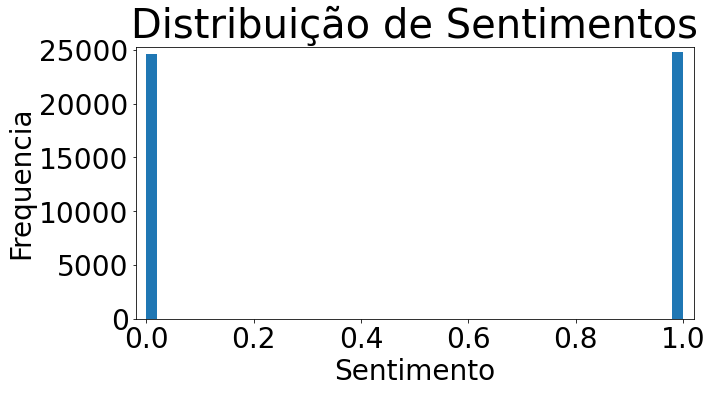

In [38]:
### primeiramente vamos plotar a frequência das reações positivas e negativas

plt.figure(figsize=(10,5))
plt.margins(0.02)
plt.xlabel('Sentimento', fontsize=28)
plt.xticks(fontsize=28)
plt.ylabel('Frequencia', fontsize=28)
plt.yticks(fontsize=28)
plt.hist(df_corpus["sentiment"], bins=50)
plt.title('Distribuição de Sentimentos', fontsize=40)
plt.show()

### Mas a visualização não ficou tão boa, vamos atribuir nomes aos sentimentos

In [39]:
### atribuir um sentimento a cada linha
df_corpus["sentimento"] = df_corpus["sentiment"].apply(lambda x: "positivo" if x > 0 else "negativo")

c:\Users\bcesa\anaconda3\envs\social_scraping\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


(array([0, 1]), [Text(0, 0, 'positivo'), Text(1, 0, 'negativo')])

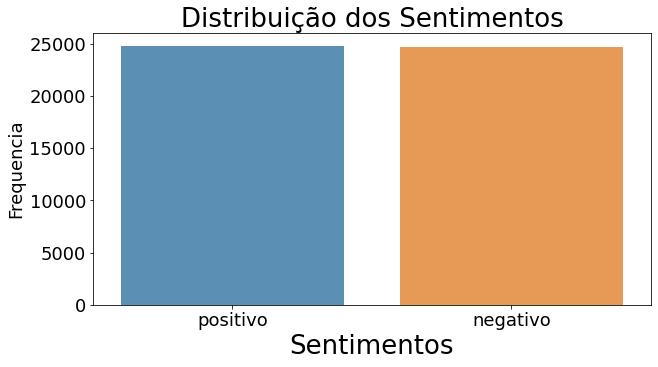

In [40]:
### desta vez temos uma visão mais clara das categorias
x_sentimento = df_corpus["sentimento"].value_counts()
y_sentimento = x_sentimento.sort_index()
plt.figure(figsize=(10,5))
sns.barplot(x_sentimento.index, x_sentimento.values, alpha=0.8)
plt.title("Distribuição dos Sentimentos", fontsize=26)
plt.ylabel('Frequencia', fontsize=18)
plt.yticks(fontsize=18)
plt.xlabel('Sentimentos', fontsize=26)
plt.xticks(fontsize=18)

### Nosso dataset traz também a query utilizada para obter o tweet

In [41]:
df_corpus.head(2)

,tweet_text,sentiment,query_used,tokens_split,tokens_lema,tokens_lema_string,tokens_split_string,sentimento
0,@BabozeirasDaTv @aliviavasconc @Haddad_Fernando https://t.co/UHUaLf9odu olha ai o seu candidato ...,1,@haddad_fernando :),"['olha', 'candidato', 'trabalha', 'verdade', 'passar', 'vergonha', 'deixar', 'amanha']","['olhar', 'candidatar', 'trabalhar', 'verdade', 'passar', 'vergonha', 'deixar', 'amanhar']",olhar candidatar trabalhar verdade passar vergonha deixar amanhar,olha candidato trabalha verdade passar vergonha deixar amanha,positivo
1,@TelesPonte @rei_da_selfie @TCelTito @metal_thiago @jairbolsonaro @folha Sabe o que me incomoda ...,1,@jairbolsonaro :),"['incomoda', 'acima', 'falei', 'reconhecida', 'amo', 'viveu', 'anos', 'vivido', 'jeito', 'escolh...","['incomodar', 'acima', 'falar', 'reconhecido', 'amar', 'viver', 'ano', 'viver', 'jeito', 'escolh...",incomodar acima falar reconhecido amar viver ano viver jeito escolher influenciar direito,incomoda acima falei reconhecida amo viveu anos vivido jeito escolheu influencia direito,positivo


In [42]:
#Analisando o dataset verifica-se que foram utilizadas 218 queries distintas
len([x.replace(":)","").replace(":(","") for x in df_corpus["query_used"].unique()])

218

In [43]:
## As queries que retornaram mais tokens são:

df_corpus["query_used"].value_counts().sort_values(ascending=False).head(10)

ciro :(         3490
bolsonaro :)    3382
bolsonaro :(    2795
haddad :(       2699
haddad :)       2684
PT :)           2225
candidato :)    1739
ciro :)         1673
politica :)     1404
politica :(     1398
Name: query_used, dtype: int64

c:\Users\bcesa\anaconda3\envs\social_scraping\lib\site-packages\wordcloud\wordcloud.py:512: DeprecationWarning: ROTATE_90 is deprecated and will be removed in Pillow 10 (2023-07-01). Use Transpose.ROTATE_90 instead.
  orientation = (Image.ROTATE_90 if orientation is None else
c:\Users\bcesa\anaconda3\envs\social_scraping\lib\site-packages\wordcloud\wordcloud.py:492: DeprecationWarning: ROTATE_90 is deprecated and will be removed in Pillow 10 (2023-07-01). Use Transpose.ROTATE_90 instead.
  orientation = Image.ROTATE_90
c:\Users\bcesa\anaconda3\envs\social_scraping\lib\site-packages\wordcloud\wordcloud.py:512: DeprecationWarning: ROTATE_90 is deprecated and will be removed in Pillow 10 (2023-07-01). Use Transpose.ROTATE_90 instead.
  orientation = (Image.ROTATE_90 if orientation is None else
c:\Users\bcesa\anaconda3\envs\social_scraping\lib\site-packages\wordcloud\wordcloud.py:512: DeprecationWarning: ROTATE_90 is deprecated and will be removed in Pillow 10 (2023-07-01). Use Transpose.R

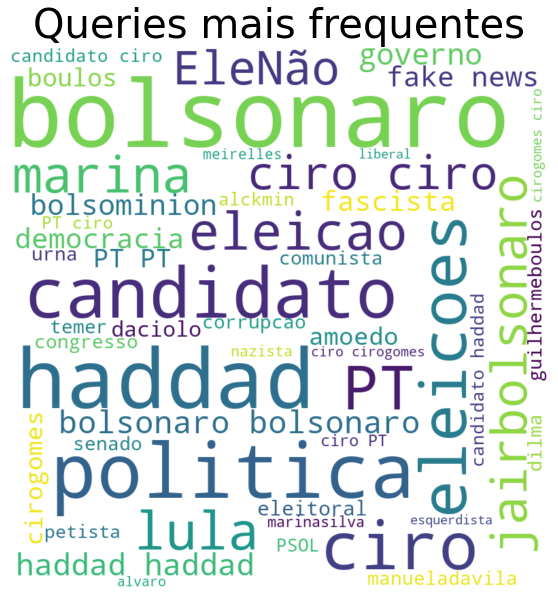

In [44]:
## visualizando os termos em uma núvem de palavras fica evidente que a maior parte das queries são sobre os nomes dos próprios candidatos

wordcloud = WordCloud(width=800, height=800, max_words=50, background_color='white').generate(" ".join(df_corpus["query_used"])) 
fig  = plt.figure(figsize=(30,10), facecolor = "white")
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("Queries mais frequentes", fontsize=40)
plt.show()

In [45]:
df_corpus.head(2)

,tweet_text,sentiment,query_used,tokens_split,tokens_lema,tokens_lema_string,tokens_split_string,sentimento
0,@BabozeirasDaTv @aliviavasconc @Haddad_Fernando https://t.co/UHUaLf9odu olha ai o seu candidato ...,1,@haddad_fernando :),"['olha', 'candidato', 'trabalha', 'verdade', 'passar', 'vergonha', 'deixar', 'amanha']","['olhar', 'candidatar', 'trabalhar', 'verdade', 'passar', 'vergonha', 'deixar', 'amanhar']",olhar candidatar trabalhar verdade passar vergonha deixar amanhar,olha candidato trabalha verdade passar vergonha deixar amanha,positivo
1,@TelesPonte @rei_da_selfie @TCelTito @metal_thiago @jairbolsonaro @folha Sabe o que me incomoda ...,1,@jairbolsonaro :),"['incomoda', 'acima', 'falei', 'reconhecida', 'amo', 'viveu', 'anos', 'vivido', 'jeito', 'escolh...","['incomodar', 'acima', 'falar', 'reconhecido', 'amar', 'viver', 'ano', 'viver', 'jeito', 'escolh...",incomodar acima falar reconhecido amar viver ano viver jeito escolher influenciar direito,incomoda acima falei reconhecida amo viveu anos vivido jeito escolheu influencia direito,positivo


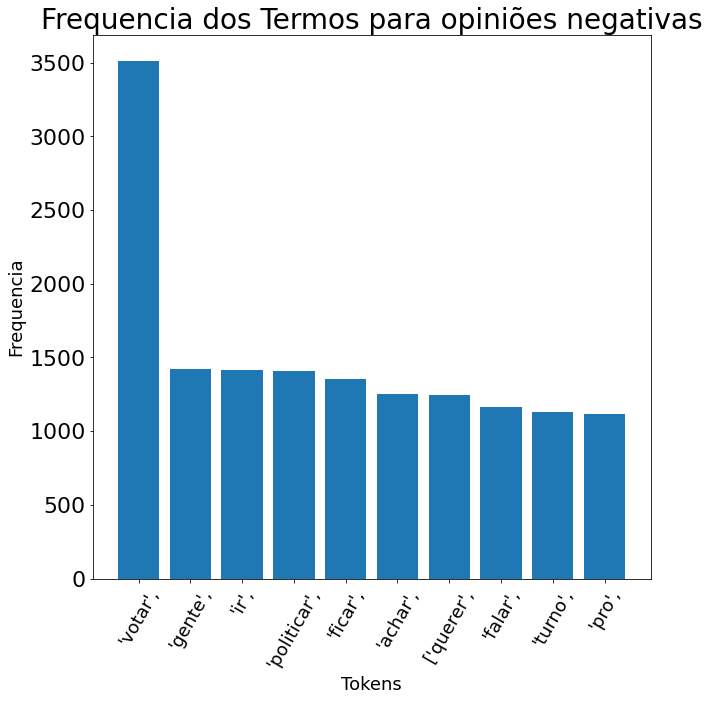

In [46]:
## Podemos também analisar os termos mais frequentes para cada sentimento em um grafico de barras

### para opiniões negativas
group_by = df_corpus.groupby("sentimento")["tokens_lema"].apply(lambda x: Counter(" ".join(x).split()).most_common(10))

group_by_negativo = group_by["negativo"]
words0 = list(zip(*group_by_negativo))[0]
freq0 = list(zip(*group_by_negativo))[1]

plt.figure(figsize=(10,10))
plt.bar(words0, freq0)
plt.xlabel('Tokens', fontsize=18)
plt.ylabel('Frequencia', fontsize=18)
plt.yticks(fontsize=22)
plt.xticks(rotation=60, fontsize=18)
plt.title('Frequencia dos Termos para opiniões negativas', fontsize=28)
plt.show()

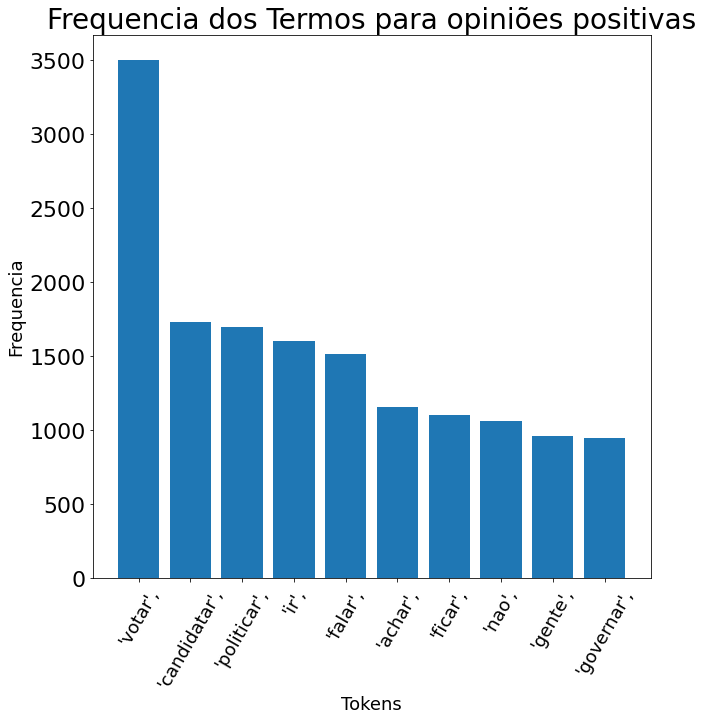

In [47]:
### para opiniões positivas
group_by = df_corpus.groupby("sentimento")["tokens_lema"].apply(lambda x: Counter(" ".join(x).split()).most_common(10))

group_by_negativo = group_by["positivo"]
words0 = list(zip(*group_by_negativo))[0]
freq0 = list(zip(*group_by_negativo))[1]

plt.figure(figsize=(10,10))
plt.bar(words0, freq0)
plt.xlabel('Tokens', fontsize=18)
plt.ylabel('Frequencia', fontsize=18)
plt.yticks(fontsize=22)
plt.xticks(rotation=60, fontsize=18)
plt.title('Frequencia dos Termos para opiniões positivas', fontsize=28)
plt.show()

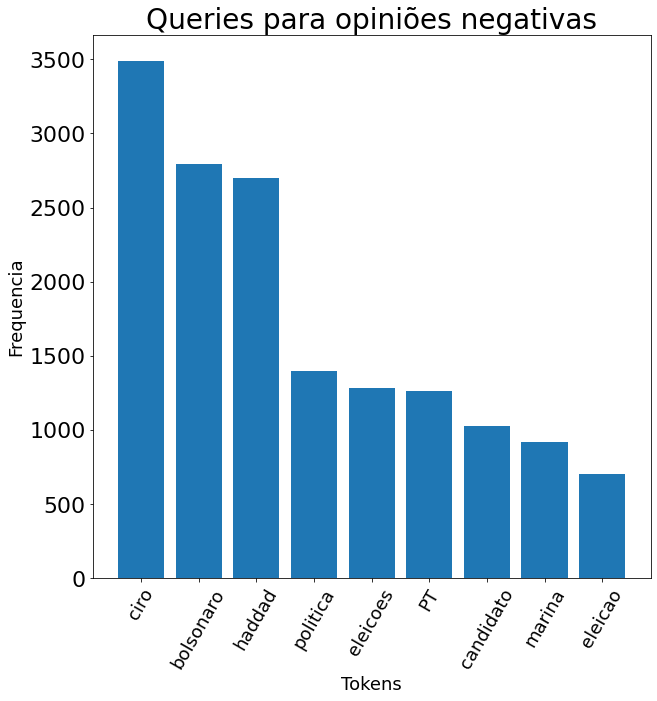

In [48]:
### Sentimentos por querie
group_by = df_corpus.groupby("sentimento")["query_used"].apply(lambda x: Counter(" ".join(x).split()).most_common(10))

emojis = [":)",":("] ### remover os emojis
group_by_negativo = [x for x in group_by["negativo"] if x[0] not in emojis]

words0 = list(zip(*group_by_negativo))[0]
freq0 = list(zip(*group_by_negativo))[1]

plt.figure(figsize=(10,10))
plt.bar(words0, freq0)
plt.xlabel('Tokens', fontsize=18)
plt.ylabel('Frequencia', fontsize=18)
plt.yticks(fontsize=22)
plt.xticks(rotation=60, fontsize=18)
plt.title('Queries para opiniões negativas', fontsize=28)
plt.show()

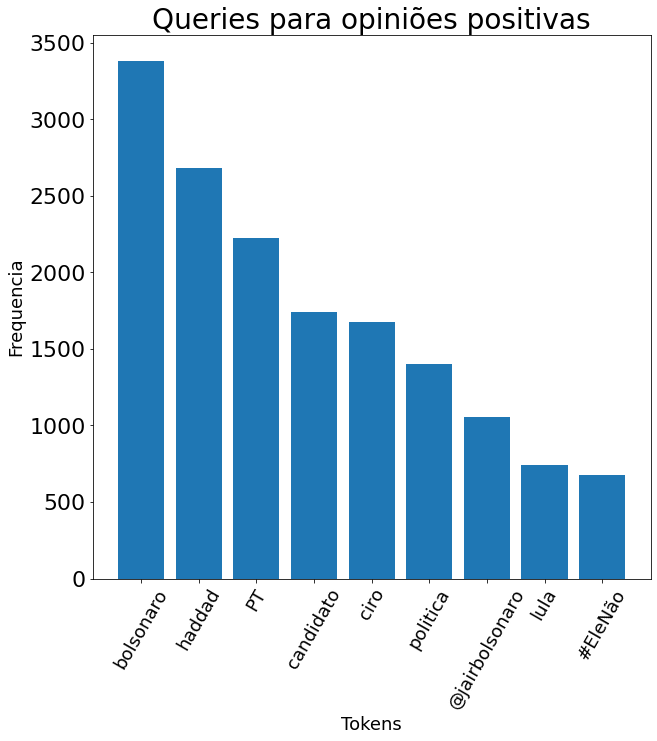

In [49]:
### Sentimentos por querie
group_by = df_corpus.groupby("sentimento")["query_used"].apply(lambda x: Counter(" ".join(x).split()).most_common(10))

emojis = [":)",":("] ### remover os emojis
group_by_negativo = [x for x in group_by["positivo"] if x[0] not in emojis]

words0 = list(zip(*group_by_negativo))[0]
freq0 = list(zip(*group_by_negativo))[1]

plt.figure(figsize=(10,10))
plt.bar(words0, freq0)
plt.xlabel('Tokens', fontsize=18)
plt.ylabel('Frequencia', fontsize=18)
plt.yticks(fontsize=22)
plt.xticks(rotation=60, fontsize=18)
plt.title('Queries para opiniões positivas', fontsize=28)
plt.show()

## Preparação dos Dados para os Modelos de Aprendizado de Máquina

In [2]:
# utilities
import re
import numpy as np
import pandas as pd
# plotting
import seaborn as sns
from wordcloud import WordCloud
import matplotlib.pyplot as plt
# nltk
from nltk.stem import WordNetLemmatizer
# sklearn
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import BernoulliNB
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.metrics import ConfusionMatrixDisplay

In [3]:
## carregar modelo par dar continuidade a análise

df_corpus = pd.read_csv("datasetlemma.csv", sep="|")

In [4]:
### Separar a feature do sentimento

X = df_corpus["tokens_lema"]
y = df_corpus["sentiment"]

In [5]:
df_corpus["tokens_lema"]

0        ['olhar', 'candidatar', 'trabalhar', 'verdade'...
1        ['incomodar', 'acima', 'falar', 'reconhecido',...
2        ['ultimar', 'podcast', 'cafe', 'brasil', 'maio...
3                       ['parabens', 'barbudo', 'gostoso']
4                                  ['passafome', 'juntar']
                               ...                        
49406                                             ['deus']
49407                   ['tse', 'rejeitar', 'candidatura']
49408                                            ['manir']
49409                               ['vdd', 'melhorzinho']
49410    ['caro', 'mal', 'opcao', 'caro', 'inqueritos',...
Name: tokens_lema, Length: 49411, dtype: object

In [6]:
## separar 95% dos dados para treino e 5% para teste

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.05, random_state=42)

In [7]:
##copiar data frame de teste para uso futuro
X_matrix = X_test.copy()

In [8]:
## transformando o dataset com TF-IDF 

vectoriser = TfidfVectorizer(ngram_range=(1,2), max_features=500000, use_idf=True)
vectoriser.fit(X_train)
print("Tamanho do vocabulário: ", len(vectoriser.vocabulary_))

X_train = vectoriser.transform(X_train)
X_test = vectoriser.transform(X_test)


Tamanho do vocabulário:  269381


### Função para avaliação do modelo

Após treinar o modelo, é preciso avaliar a performance. Para tal foram utilizadas as seguntes métricas


    Acurácia e Matriz de confusão





In [9]:
def model_evaluate(model):
    ## prediz os valores para o dataset de teste
    y_pred = model.predict(X_test)
    #printa as metricas de avaliação para o dataset
    print("Acurácia :", accuracy_score(y_test, y_pred),"\n", classification_report(y_test, y_pred))
    ## cria a matriz de confusão
    cf_matrix = confusion_matrix(y_test, y_pred)
    #printa a matriz de confusão
    categories = ["Negativo", "Positivo"]
    group_names = ["True Neg", "False Pos", "False Neg", "True Pos"]
    group_percentages = ["{0:.2f}%".format(value * 100 / sum(cf_matrix.flatten())) for value in cf_matrix.flatten()]
    labels = [f'{v1}n{v2}' for v1, v2 in zip(group_names,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)
    sns.heatmap(cf_matrix, annot = labels, cmap = 'Blues',fmt = '', xticklabels = categories, yticklabels = categories)
    plt.xlabel("Predicted values", fontdict = {'size':14}, labelpad = 10)
    return accuracy_score(y_test, y_pred), classification_report(y_test, y_pred)
    




Construção dos modelos:

Para resolver o problema declarado, foram utilizados os seguintes modelos

    Bernoulli Naive Bayes
    SVM (Support Vector Machine)
    Logistic Regression





Acurácia : 0.7094293808174827 
               precision    recall  f1-score   support

           0       0.66      0.89      0.76      1278
           1       0.82      0.51      0.63      1193

    accuracy                           0.71      2471
   macro avg       0.74      0.70      0.70      2471
weighted avg       0.74      0.71      0.70      2471



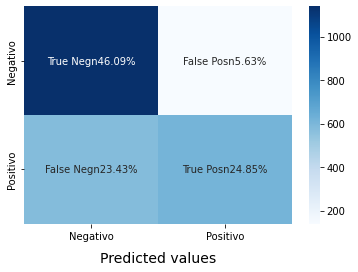

In [10]:
### modelo de bernoulli NB

BNBmodel = BernoulliNB()
BNBmodel.fit(X_train, y_train)
model_evaluate(BNBmodel)
y_pred1 = BNBmodel.predict(X_test)

Acurácia : 0.7559692432213678 
               precision    recall  f1-score   support

           0       0.78      0.73      0.76      1278
           1       0.73      0.78      0.76      1193

    accuracy                           0.76      2471
   macro avg       0.76      0.76      0.76      2471
weighted avg       0.76      0.76      0.76      2471



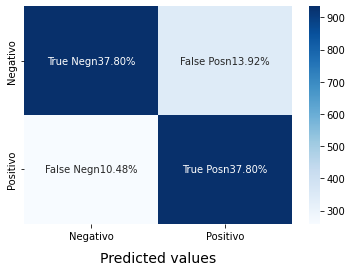

In [11]:
### modelo de Suport Vector Machine

SVCmodel = LinearSVC()

SVCmodel.fit(X_train, y_train)
model_evaluate(SVCmodel)
y_pred2 = SVCmodel.predict(X_test)

Acurácia : 0.7571833265884257 
               precision    recall  f1-score   support

           0       0.79      0.72      0.76      1278
           1       0.73      0.79      0.76      1193

    accuracy                           0.76      2471
   macro avg       0.76      0.76      0.76      2471
weighted avg       0.76      0.76      0.76      2471



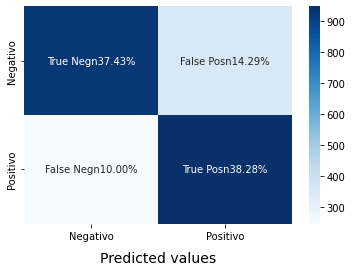

In [12]:
### modelo de regressão logística

LRmodel = LogisticRegression(C = 2, max_iter = 1000, n_jobs=-1)
LRmodel.fit(X_train, y_train)
model_evaluate(LRmodel)
y_pred3 = LRmodel.predict(X_test)

Precisão: No que diz respeito à precisão do modelo, a regressão logística tem um desempenho melhor do que o SVM, que por sua vez tem um desempenho melhor do que o Bernoulli Naive Bayes.

Pontuação F1: As pontuações F1 para classe 0 e classe 1 são idênticas para os três modelos (76) com a excessão do Bernoulli Naive Bayes que apresentou 63 para a classe 1.


In [13]:
### criar uma versão mais simples da função de avaliação

def model_evaluate_optmize(model):
    ## prediz os valores para o dataset de teste
    y_pred = model.predict(X_test)
        
    return accuracy_score(y_test, y_pred), classification_report(y_test, y_pred)
    




In [14]:
### agora vamos tentar otimizar a acurácia do modelo de regressão logística com o critério de otimização de C e max_iter
df_parametros = pd.DataFrame(columns = ["C", "max_iter", "acurácia"])
contador = 0
for c in [0.01, 0.1, 1,2,3,4,5,6,7,8,9, 10, 100]:
    for max_iter in [1000, 10000, 100000, 1000000]:
        LRmodel = LogisticRegression(C = c, max_iter = max_iter, n_jobs=-1)
        LRmodel.fit(X_train, y_train)
        acuracia, class_report = model_evaluate_optmize(LRmodel)
        df_parametros.at[contador, "C"] = c
        df_parametros.at[contador, "max_iter"] = max_iter
        df_parametros.at[contador, "acurácia"] = acuracia
        contador += 1


df_parametros[df_parametros["acurácia"] == df_parametros["acurácia"].max()]

,C,max_iter,acurácia
28,6,1000,0.761635
29,6,10000,0.761635
30,6,100000,0.761635
31,6,1000000,0.761635
32,7,1000,0.761635
33,7,10000,0.761635
34,7,100000,0.761635
35,7,1000000,0.761635


Melhor acurácia:  0.7616349656009712 com C =  6  e max_iter =  1000
Acurácia : 0.7616349656009712 
               precision    recall  f1-score   support

           0       0.79      0.73      0.76      1278
           1       0.73      0.79      0.76      1193

    accuracy                           0.76      2471
   macro avg       0.76      0.76      0.76      2471
weighted avg       0.76      0.76      0.76      2471



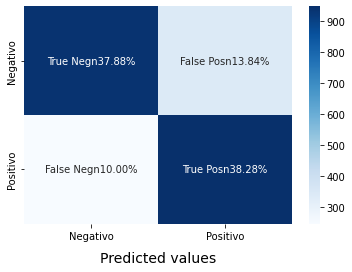

In [15]:
### obter a melhor acurácia
best_acuracy = df_parametros["acurácia"].max()

best_c = df_parametros[df_parametros["acurácia"] == best_acuracy]["C"].values[0]
best_max_iter = df_parametros[df_parametros["acurácia"] == best_acuracy]["max_iter"].values[0]

print("Melhor acurácia: ", best_acuracy, "com C = ", best_c, " e max_iter = ", best_max_iter)


LRmodel = LogisticRegression(C = best_c, max_iter = best_max_iter, n_jobs=-1)
LRmodel.fit(X_train, y_train)
model_evaluate(LRmodel)
y_pred3 = LRmodel.predict(X_test)